In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


class Gambler:
    """ Example 4.3: Gambler's Problem """
    def __init__(self, goal, ph):
        self.goal = goal    # terminal state of capital reached  ( self.goal=N=100 in our problem)
        self.ph = ph        # probability of heads

    def get_states(self):
        """ states are gambler's capital """
        return np.arange(1, self.goal)

    def get_possible_actions(self, state):
        """ actions are stakes """
        return np.arange(min(state, self.goal - state) + 1)

    def get_reward(self, state, action, next_state):
        if next_state == self.goal:
            return 1
        else:
            return 0

    def get_transitions_states_and_probs(self, state, action):
        return [(state + action, self.ph), (state - action, 1 - self.ph)]


class ValueIterationAgent:
    """ Implementation of Section 4.4 value iteration algorithm
    Note: the output policy (in Figure 4.3) is very sensitive to:
          the eps variable (1e-4) and the q_value precision while finding the argmax (4 significant digits)
    """
    def __init__(self, mdp, n_sweeps, discount=1, eps=1e-4):
        self.mdp = mdp
        self.discount = discount
        self.eps = eps

        # initialize
        self.values = defaultdict(int)
        self.policy = {}
        self.value_sweeps = np.zeros((n_sweeps, self.mdp.get_states().shape[0] + 1))

        for i in range(n_sweeps):

            for state in self.mdp.get_states():
                old_value = self.values[state]
                q_values = {}

                # compute q values
                for action in self.mdp.get_possible_actions(state):
                    q_values[(state, action)] = self.compute_q_value(state, action)

                # update value function in-place with the optimal q value
                self.values[state] = max(q_values.values())

                # update policy if a value function update occured;
                if abs(self.values[state] - old_value) > eps:
                    # for policy choose the min action; that is if more than one actions have max q_values,
                    # then agent minimizes stake at risk from among the new set of actions
                    # alt: python max break ties by data structure index order; so the first q_value where the max
                    # occurs is recorded; thus the action corresponding to the first max(q_val) is the argmax.
                    actions = [a for (s,a), v in q_values.items() if round(v,4) == round(max(q_values.values()),4)]
                    self.policy[state] = min(actions)

            # record value sweeps for plotting
            self.value_sweeps[i] = self.get_values()

    def compute_q_value(self, state, action):
        q_value = 0
        for next_state, prob in self.mdp.get_transitions_states_and_probs(state, action):
            reward = self.mdp.get_reward(state, action, next_state)
            q_value += prob * (reward + self.discount * self.values[next_state])
        return q_value

    def get_values(self):
        values = np.zeros(self.mdp.get_states().shape[0] + 1)
        for k, v in self.values.items():
            if k == self.mdp.goal: continue
            values[k] = v
        return values

    def get_value_sweeps(self):
        return self.value_sweeps

    def get_policy(self):
        return self.policy


# --------------------
# Figure 4.3: The solution to the gambler’s problem for ph = 0.4.
# The upper graph shows the value function found by successive sweeps of value iteration.
# The lower graph shows the final policy.
# --------------------



State Value Function =  [[0.         0.         0.         ... 0.92224    0.92224    0.953344  ]
 [0.         0.         0.         ... 0.92224    0.93972791 0.96383675]
 [0.         0.         0.         ... 0.92224    0.94053413 0.96432048]
 ...
 [0.         0.00206562 0.00516406 ... 0.92324389 0.94055495 0.96433297]
 [0.         0.00206562 0.00516406 ... 0.92324389 0.94055495 0.96433297]
 [0.         0.00206562 0.00516406 ... 0.92324389 0.94055495 0.96433297]]
policy=  {50: 50, 51: 1, 52: 2, 53: 3, 54: 4, 55: 5, 56: 6, 57: 7, 58: 8, 59: 9, 60: 10, 61: 11, 62: 12, 63: 12, 64: 11, 65: 10, 66: 9, 67: 8, 68: 7, 69: 6, 70: 5, 71: 4, 72: 3, 73: 2, 74: 1, 75: 25, 76: 1, 77: 2, 78: 3, 79: 4, 80: 5, 81: 6, 82: 7, 83: 8, 84: 9, 85: 10, 86: 11, 87: 12, 88: 12, 89: 11, 90: 10, 91: 9, 92: 8, 93: 7, 94: 6, 95: 5, 96: 4, 97: 3, 98: 2, 99: 1, 25: 25, 26: 1, 27: 2, 28: 3, 29: 4, 30: 5, 31: 6, 32: 7, 33: 8, 34: 9, 35: 10, 36: 11, 37: 12, 38: 12, 39: 11, 40: 10, 41: 9, 42: 8, 43: 7, 44: 6, 45: 5, 46: 

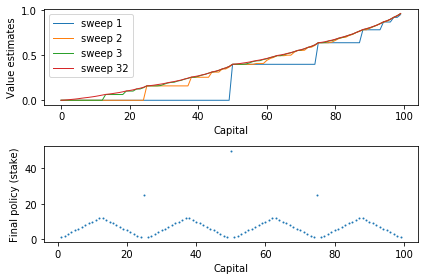

In [6]:
def fig_4_3():
    mdp = Gambler(goal=100, ph=0.4)
    agent = ValueIterationAgent(mdp, n_sweeps=50)
    value_sweeps = agent.get_value_sweeps()
    policy = agent.get_policy()
    print("State Value Function = ", value_sweeps)
    print("policy= ", policy)

    plt.subplot(2,1,1)
    for sweep in [1,2,3,32]:
        plt.plot(value_sweeps[sweep-1], label='sweep {}'.format(sweep), lw=1)
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend()

    plt.subplot(2,1,2)
    plt.scatter(policy.keys(), policy.values(), s=1)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')

    plt.tight_layout()


if __name__ == '__main__':
    fig_4_3()